In [1]:
%load_ext autoreload
%autoreload 2
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

import jax
import jax.numpy as jnp
import numpyro

2024-01-08 08:49:39.956473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/env_dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
plt.style.use("seaborn-v0_8")

2024-01-08 08:49:41.967723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-08 08:49:41.988237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-08 08:49:41.988467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
jax.dtypes

<module 'jax.dtypes' from '/env_dl/lib/python3.10/site-packages/jax/dtypes.py'>

In [4]:
x = jnp.array(3, dtype=np.float32)

In [5]:
x

Array(3., dtype=float32)

In [6]:
x = jnp.arange(5)
x, x.at[0]

(Array([0, 1, 2, 3, 4], dtype=int32),
 _IndexUpdateRef(Array([0, 1, 2, 3, 4], dtype=int32), 0))

In [7]:
y = x.at[0].set(-1)
y, x

(Array([-1,  1,  2,  3,  4], dtype=int32), Array([0, 1, 2, 3, 4], dtype=int32))

In [8]:
x.at[1].multiply(9)

Array([0, 9, 2, 3, 4], dtype=int32)

In [9]:
x

Array([0, 1, 2, 3, 4], dtype=int32)

In [10]:
x.at[1].apply(lambda x: x + 3)

Array([0, 4, 2, 3, 4], dtype=int32)

In [11]:
x.at[0].get()

Array(0, dtype=int32)

In [12]:
x.at[100].get()

Array(4, dtype=int32)

In [13]:
x.at[100].get(mode="fill")

Array(-2147483648, dtype=int32)

In [14]:
x.at[100].get(mode="clip", )

Array(4, dtype=int32)

In [15]:
x.at[100].get(mode="drop", )

Array(-2147483648, dtype=int32)

In [16]:
x.at[100].get(mode="fill", fill_value=-100)

Array(-100, dtype=int32)

In [17]:
x = jnp.arange(4*5).reshape((4, 5))
x

Array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]], dtype=int32)

In [18]:
(x > 3).all(axis=1, keepdims=True)

Array([[False],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [19]:
key = jax.random.PRNGKey(seed=0)
x = jax.random.randint(key, (4, 5), minval=0, maxval=50)
x

Array([[44, 15, 20, 22, 13],
       [ 0, 48, 36, 45, 13],
       [48, 24, 29,  4,  6],
       [42, 26, 16, 43, 48]], dtype=int32)

In [20]:
jnp.amax(x)

Array(48, dtype=int32)

In [21]:
jnp.amin(x)

Array(0, dtype=int32)

In [22]:
jnp.argwhere(x > 13)

Array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [1, 1],
       [1, 2],
       [1, 3],
       [2, 0],
       [2, 1],
       [2, 2],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4]], dtype=int32)

In [23]:
jnp.where(x > 3,)

(Array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32),
 Array([0, 1, 2, 3, 4, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32))

In [24]:
jnp.where(x > 3, 1, 0).astype(bool)

Array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [25]:
jnp.array_split(x, 4, axis=0)

[Array([[44, 15, 20, 22, 13]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13]], dtype=int32),
 Array([[48, 24, 29,  4,  6]], dtype=int32),
 Array([[42, 26, 16, 43, 48]], dtype=int32)]

In [26]:
jnp.array_split(x, 6, axis=0)

[Array([[44, 15, 20, 22, 13]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13]], dtype=int32),
 Array([[48, 24, 29,  4,  6]], dtype=int32),
 Array([[42, 26, 16, 43, 48]], dtype=int32),
 Array([], dtype=int32),
 Array([], dtype=int32)]

In [27]:
np.asarray(x)

array([[44, 15, 20, 22, 13],
       [ 0, 48, 36, 45, 13],
       [48, 24, 29,  4,  6],
       [42, 26, 16, 43, 48]], dtype=int32)

In [28]:
jnp.array_split(np.asarray(x), 6, axis=0)

[Array([[44, 15, 20, 22, 13]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13]], dtype=int32),
 Array([[48, 24, 29,  4,  6]], dtype=int32),
 Array([[42, 26, 16, 43, 48]], dtype=int32),
 Array([], dtype=int32),
 Array([], dtype=int32)]

In [29]:
jnp.array_split(x, [1, 3, ], axis=0)

[Array([[44, 15, 20, 22, 13]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6]], dtype=int32),
 Array([[42, 26, 16, 43, 48]], dtype=int32)]

In [30]:
jnp.array_split(x, [1, 3,], axis=0)

[Array([[44, 15, 20, 22, 13]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6]], dtype=int32),
 Array([[42, 26, 16, 43, 48]], dtype=int32)]

In [31]:
jnp.sort(x, axis=1)

Array([[13, 15, 20, 22, 44],
       [ 0, 13, 36, 45, 48],
       [ 4,  6, 24, 29, 48],
       [16, 26, 42, 43, 48]], dtype=int32)

In [32]:
jnp.argsort(x, axis=1)

Array([[4, 1, 2, 3, 0],
       [0, 4, 2, 3, 1],
       [3, 4, 1, 2, 0],
       [2, 1, 0, 3, 4]], dtype=int32)

In [33]:
jnp.argmin(x, 1)

Array([4, 0, 3, 2], dtype=int32)

In [34]:
jnp.broadcast_to(x, (3, 1, 4, 5))

Array([[[[44, 15, 20, 22, 13],
         [ 0, 48, 36, 45, 13],
         [48, 24, 29,  4,  6],
         [42, 26, 16, 43, 48]]],


       [[[44, 15, 20, 22, 13],
         [ 0, 48, 36, 45, 13],
         [48, 24, 29,  4,  6],
         [42, 26, 16, 43, 48]]],


       [[[44, 15, 20, 22, 13],
         [ 0, 48, 36, 45, 13],
         [48, 24, 29,  4,  6],
         [42, 26, 16, 43, 48]]]], dtype=int32)

In [35]:
y

Array([-1,  1,  2,  3,  4], dtype=int32)

In [36]:
jnp.diag(y, 2)

Array([[ 0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [37]:
jnp.diag(y, -2)

Array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0]], dtype=int32)

In [38]:
jnp.diag_indices(5)

(Array([0, 1, 2, 3, 4], dtype=int32), Array([0, 1, 2, 3, 4], dtype=int32))

In [39]:
jnp.diag_indices(6, 30), len(jnp.diag_indices(5, 30))

((Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=int32),
  Array([0, 1, 2, 3, 4, 5], dtype=

In [40]:
jnp.diagflat(y)

Array([[-1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  4]], dtype=int32)

In [41]:
x, jnp.diag(x)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([44, 48, 29, 43], dtype=int32))

In [42]:
x, jnp.diagflat(x)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,


In [43]:
jnp.trace(x)

Array(164, dtype=int32)

In [44]:
jnp.triu(x)

Array([[44, 15, 20, 22, 13],
       [ 0, 48, 36, 45, 13],
       [ 0,  0, 29,  4,  6],
       [ 0,  0,  0, 43, 48]], dtype=int32)

In [45]:
jnp.tril(x)

Array([[44,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0],
       [48, 24, 29,  0,  0],
       [42, 26, 16, 43,  0]], dtype=int32)

In [46]:
jnp.tril_indices(5)

(Array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=int32),
 Array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4], dtype=int32))

In [47]:
x, jnp.flip(x, 1)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([[13, 22, 20, 15, 44],
        [13, 45, 36, 48,  0],
        [ 6,  4, 29, 24, 48],
        [48, 43, 16, 26, 42]], dtype=int32))

In [48]:
x, jnp.fliplr(x)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([[13, 22, 20, 15, 44],
        [13, 45, 36, 48,  0],
        [ 6,  4, 29, 24, 48],
        [48, 43, 16, 26, 42]], dtype=int32))

In [49]:
x, jnp.flipud(x)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([[42, 26, 16, 43, 48],
        [48, 24, 29,  4,  6],
        [ 0, 48, 36, 45, 13],
        [44, 15, 20, 22, 13]], dtype=int32))

In [50]:
x, jnp.roll(x, -1, axis=0)

(Array([[44, 15, 20, 22, 13],
        [ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48]], dtype=int32),
 Array([[ 0, 48, 36, 45, 13],
        [48, 24, 29,  4,  6],
        [42, 26, 16, 43, 48],
        [44, 15, 20, 22, 13]], dtype=int32))

In [51]:
x.shape, y.shape

((4, 5), (5,))

In [52]:
jnp.dot(x, y)

Array([129, 307,  70, 337], dtype=int32)

In [53]:
jnp.dot(np.broadcast_to(x, (3, 4, 5)), np.tile(np.expand_dims(y, 1) , (1, 4)))

Array([[[129, 129, 129, 129],
        [307, 307, 307, 307],
        [ 70,  70,  70,  70],
        [337, 337, 337, 337]],

       [[129, 129, 129, 129],
        [307, 307, 307, 307],
        [ 70,  70,  70,  70],
        [337, 337, 337, 337]],

       [[129, 129, 129, 129],
        [307, 307, 307, 307],
        [ 70,  70,  70,  70],
        [337, 337, 337, 337]]], dtype=int32)

In [54]:
jnp.dot(np.broadcast_to(x, (3, 4, 5)), np.tile(np.expand_dims(y, 1) , (1, 4))).shape

(3, 4, 4)

In [55]:
key

Array([0, 0], dtype=uint32)

In [56]:
key = jax.random.PRNGKey(seed=5)

In [57]:
key

Array([0, 5], dtype=uint32)

In [58]:
key, *_ = jax.random.split(key, 20)

In [59]:
key

Array([  84775539, 2720752065], dtype=uint32)

In [60]:
_

[Array([ 980787721, 1571846600], dtype=uint32),
 Array([1007743226, 3120075090], dtype=uint32),
 Array([3201064266, 3236850083], dtype=uint32),
 Array([740533610, 640878686], dtype=uint32),
 Array([ 475814257, 3173774151], dtype=uint32),
 Array([1908136826, 1173383811], dtype=uint32),
 Array([ 179546637, 1840145968], dtype=uint32),
 Array([1965024788, 1524004005], dtype=uint32),
 Array([ 697406116, 3303489305], dtype=uint32),
 Array([4172440623, 3335609293], dtype=uint32),
 Array([ 821161162, 2762259627], dtype=uint32),
 Array([1828496065, 2758455946], dtype=uint32),
 Array([3523310616,  467218465], dtype=uint32),
 Array([3440189246, 2347239895], dtype=uint32),
 Array([1978253726,  662287391], dtype=uint32),
 Array([ 300712910, 2123853990], dtype=uint32),
 Array([2297842293, 2913231330], dtype=uint32),
 Array([2173157618, 2214942288], dtype=uint32),
 Array([ 202744884, 3134903809], dtype=uint32)]

In [61]:
key, subkey = jax.random.split(key)

In [62]:
key

Array([2988791336, 2133025927], dtype=uint32)

In [63]:
w = jnp.matmul(jax.random.normal(subkey, (4, 3, 2)), jax.random.normal(subkey, (2, 4)))
jnp.shape(w)

(4, 3, 4)

In [64]:
w = jnp.matmul(jax.random.normal(subkey, (4, 3, 2, 5)), jax.random.normal(subkey, (5, 2)))
jnp.shape(w)

(4, 3, 2, 2)

In [65]:
w = jnp.matmul(jax.random.normal(subkey, (4, 3, 2, 5)), jax.random.normal(subkey, (4, 3, 5, 2)))
jnp.shape(w)

(4, 3, 2, 2)

In [66]:
x = jax.random.normal(subkey, (4, 10))
x

Array([[-1.9930767 , -1.3934299 , -0.68941104,  0.0639805 , -0.7785856 ,
         2.6118815 ,  1.677761  ,  0.39413148,  0.8744686 , -1.3173182 ],
       [ 1.3594457 , -1.778455  , -0.46226558,  1.0610049 , -0.43135017,
        -0.82170516,  3.516832  ,  0.12264854,  0.52996224, -0.65820223],
       [-1.2196643 , -0.36332542, -0.6067744 , -1.118698  ,  1.8194904 ,
        -0.86865413, -0.96552336, -0.15416686, -0.16845837, -1.3569748 ],
       [ 1.2428071 ,  1.5593872 , -0.45243326, -0.16011813, -0.05142116,
        -0.03753103, -0.5560572 , -0.6731499 , -0.32712233,  0.0626047 ]],      dtype=float32)

In [67]:
jnp.percentile(x, jnp.linspace(0, 1., 5), axis=-1)

Array([[-1.9930767 , -1.778455  , -1.3569748 , -0.6731499 ],
       [-1.9795847 , -1.7569282 , -1.3538854 , -0.67051536],
       [-1.9660925 , -1.7354012 , -1.3507959 , -0.6678807 ],
       [-1.9526005 , -1.7138745 , -1.3477064 , -0.6652461 ],
       [-1.9391085 , -1.6923476 , -1.344617  , -0.66261154]],      dtype=float32)

In [68]:
x = jnp.arange(5.)
x

Array([0., 1., 2., 3., 4.], dtype=float32)

In [69]:
def f(x):
    return jnp.sum(x**2)

In [70]:
g = jax.grad(f)

In [71]:
g

<function __main__.f(x)>

In [72]:
g(x)

Array([0., 2., 4., 6., 8.], dtype=float32)

In [73]:
def f(x):
    return x**2

In [74]:
jax.jacobian(f)(x)

Array([[0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 8.]], dtype=float32)

In [75]:
def batch_prod(x, w):
    return jnp.dot(x, w)


In [76]:
x = jnp.arange(2*5*4.).reshape((2, 5, 4))
y = jnp.ones(4)
x, y

(Array([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],
 
        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]], dtype=float32),
 Array([1., 1., 1., 1.], dtype=float32))

In [77]:
f = jax.vmap(batch_prod, in_axes=(1, None))

In [78]:
f(x, y)

Array([[  6.,  86.],
       [ 22., 102.],
       [ 38., 118.],
       [ 54., 134.],
       [ 70., 150.]], dtype=float32)

In [79]:
f = jax.vmap(batch_prod, in_axes=(1, None), out_axes=1)

In [80]:
f(x, y)

Array([[  6.,  22.,  38.,  54.,  70.],
       [ 86., 102., 118., 134., 150.]], dtype=float32)

In [81]:
f = jax.vmap(batch_prod, in_axes=(1, None), out_axes=0)

In [82]:
f(x, y)

Array([[  6.,  86.],
       [ 22., 102.],
       [ 38., 118.],
       [ 54., 134.],
       [ 70., 150.]], dtype=float32)

In [83]:
@jax.jit
def func(x, y):
    return (x**2 + y).sum()

In [84]:
x = jnp.array(5.0)

In [85]:
g = jax.grad(func, )

In [86]:
g(x, y)

Array(40., dtype=float32, weak_type=True)

In [87]:
g = jax.grad(func, argnums=(0, 1))

In [88]:
g(x, y)

(Array(40., dtype=float32, weak_type=True),
 Array([1., 1., 1., 1.], dtype=float32))

In [89]:
g = jax.grad(func, argnums=(1))
g(x, y)

Array([1., 1., 1., 1.], dtype=float32)

In [90]:
@jax.jit
def func(x, y):
    return (x**2 + jax.lax.stop_gradient(y)).sum()

In [91]:
g = jax.grad(func, argnums=(0, 1))
g(x, y)

(Array(40., dtype=float32, weak_type=True),
 Array([0., 0., 0., 0.], dtype=float32))

In [92]:
jax.random.PRNGKey(10)

Array([ 0, 10], dtype=uint32)

In [93]:
jax.random.PRNGKey(10) == jnp.array([0, 10])

Array([ True,  True], dtype=bool)

In [94]:
key = jax.random.PRNGKey(10)

In [95]:
jax.random.normal(key=key, shape=(5, 10))

Array([[ 0.42030108, -0.06056546,  0.22010379, -0.15197884,  0.46862835,
         0.3374904 ,  0.01795285,  0.12772979, -0.20340912, -1.8999158 ],
       [-0.78252006,  1.1284409 , -0.5952904 , -0.3827003 ,  1.1825141 ,
         0.14582098,  0.04951514, -1.1337341 , -0.20873532,  0.371957  ],
       [-1.3804309 , -1.0564566 ,  0.76576585, -1.703756  , -0.47371206,
         0.15269968,  1.6074513 , -0.6311777 , -0.07509681, -0.452469  ],
       [ 0.8433158 ,  0.41477522,  0.19428597,  0.8396955 ,  1.6231618 ,
        -0.7286042 , -1.2458912 , -0.02479621, -0.12747055,  1.6777537 ],
       [-0.34432983, -1.4066381 ,  1.520736  ,  1.5373518 ,  0.5486705 ,
         0.35862777, -1.8304359 ,  1.128324  ,  0.31939405,  0.12123182]],      dtype=float32)

In [96]:
jax.random.normal(key=key, shape=(5, 10))

Array([[ 0.42030108, -0.06056546,  0.22010379, -0.15197884,  0.46862835,
         0.3374904 ,  0.01795285,  0.12772979, -0.20340912, -1.8999158 ],
       [-0.78252006,  1.1284409 , -0.5952904 , -0.3827003 ,  1.1825141 ,
         0.14582098,  0.04951514, -1.1337341 , -0.20873532,  0.371957  ],
       [-1.3804309 , -1.0564566 ,  0.76576585, -1.703756  , -0.47371206,
         0.15269968,  1.6074513 , -0.6311777 , -0.07509681, -0.452469  ],
       [ 0.8433158 ,  0.41477522,  0.19428597,  0.8396955 ,  1.6231618 ,
        -0.7286042 , -1.2458912 , -0.02479621, -0.12747055,  1.6777537 ],
       [-0.34432983, -1.4066381 ,  1.520736  ,  1.5373518 ,  0.5486705 ,
         0.35862777, -1.8304359 ,  1.128324  ,  0.31939405,  0.12123182]],      dtype=float32)

In [97]:
key = jax.random.PRNGKey(10)

In [98]:
new_key, *subkey = jax.random.split(key, 50)

In [99]:
new_key

Array([2557219826, 3749797334], dtype=uint32)

In [100]:
len(subkey)

49

In [101]:
jax.tree_util.tree_leaves([1, 2, 3])

[1, 2, 3]

In [102]:
jax.tree_util.tree_leaves([1, 2, ()])

[1, 2]

In [103]:
jax.tree_util.tree_leaves([1, 2, []])

[1, 2]

In [104]:
jax.tree_util.tree_leaves([1, 2, dict(a=5, b=7)])

[1, 2, 5, 7]

In [105]:
jax.tree_util.tree_leaves([1, 2, dict(a=5, b=[1, 5, -1])])

[1, 2, 5, 1, 5, -1]

In [106]:
jax.tree_util.tree_map(lambda x: x + 1, [[1, 2, 3], [4, 5, 6]])

[[2, 3, 4], [5, 6, 7]]

In [107]:
jax.tree_util.tree_map(lambda x: x + 1, [[1, 2, 3], [4, 5, {'a': 6, "b": 7}]])

[[2, 3, 4], [5, 6, {'a': 7, 'b': 8}]]

In [108]:
jax.tree_util.tree_map(lambda x: x + 1, [[1, 2], [4, 5, {'a': 6, "b": 7}]])

[[2, 3], [5, 6, {'a': 7, 'b': 8}]]

In [109]:
jax.tree_util.tree_map(lambda x, y: x + y, 
                       [[1, 2], [4, 5, {'a': 6, "b": 7}]],
                       [[ 3, 2], [4, 5, {'a': 6, "b": 8}]],
                       )

[[4, 4], [8, 10, {'a': 12, 'b': 15}]]

In [110]:
np.random.seed(558688)
state = np.random.get_state()

In [111]:
x = numpyro.sample("x", numpyro.distributions.Uniform(-1., 1.), rng_key=subkey[0], sample_shape=(100, 8))
m = numpyro.sample("m", numpyro.distributions.Normal(0., -1.), rng_key=subkey[1], sample_shape=(8,))
m1 = jnp.log(1 + m)
s = numpyro.sample("s", numpyro.distributions.LogNormal(0, 1.), rng_key=subkey[2],)
y = x @ m + s + numpyro.sample("s", numpyro.distributions.Normal(0, 1.,), rng_key=subkey[3], sample_shape=(100,))
y

Array([ 2.14199090e+00, -8.07691693e-01,  1.26751781e-01,  1.85495377e+00,
        1.17005658e+00, -1.02231055e-01, -4.90567625e-01,  1.34327710e+00,
       -1.20233870e+00, -8.40627551e-01,  2.93754387e+00,  8.98693800e-01,
        1.22946346e+00,  1.98344278e+00, -2.19409168e-01, -1.41044545e+00,
        9.09378707e-01,  3.90317678e+00, -3.08588862e-01, -1.29870713e+00,
        8.17582488e-01,  1.75450516e+00,  2.67118073e+00, -9.90965962e-01,
        2.24020076e+00, -1.43410575e+00,  1.17588568e+00,  1.13849449e+00,
       -2.01387286e-01, -6.93761885e-01,  1.55107129e+00, -3.59898806e-03,
        1.13255167e+00, -2.31285945e-01,  2.17942595e+00,  8.28429818e-01,
        1.38647854e+00, -2.06096148e+00, -4.04136360e-01,  2.95576310e+00,
       -5.22887707e-02,  8.32147837e-01,  6.38064146e-02,  2.82053500e-01,
       -7.52611279e-01,  2.22006083e+00, -5.37059188e-01,  2.82165110e-01,
        1.00257432e+00,  8.21121454e-01, -7.73652077e-01,  2.62921166e+00,
       -2.03411058e-02,  

In [112]:

MODEL_NAMES = 1
        
class Linear:
    
    def __init__(self, in_feat, out_feat, name=None):
        if name is None:
            global MODEL_NAMES
            self.name = f"linear_{MODEL_NAMES}"
            MODEL_NAMES += 1
        self.w = jnp.array(np.random.normal(size=(in_feat, out_feat)).astype(float)) * np.sqrt(2 / in_feat)
        self.b = jnp.zeros(shape=[out_feat], dtype=float)
    
    def __call__(self, x):
        return jnp.matmul(x, self.w) + self.b
    
    def update(self, w, b):
        self.w = w
        self.b = b
        return True

    def parameters(self):
        yield {self.name + "/w": self.w, self.name + "/b": self.b}

class Model:
    def __init__(self, ):
        self.lin1 = Linear(8, 4)
        self.lin2 = Linear(4, 1)
    
    def __call__(self, x):
        x = self.lin1(x)
        x = jax.nn.relu(x)
        x = self.lin2(x)
        return x
    
    def forward(self, parameters, x):
        x = jax.nn.relu(jnp.matmul(x, parameters["linear_1/w"]) + parameters["linear_1/b"])
        x = jnp.matmul(x, parameters["linear_2/w"]) + parameters["linear_2/b"]
        return x
    
    def parameters(self):
        params = dict()
        for model in [self.lin1, self.lin2]:
            for p in model.parameters():
                params.update(p)
        return params        
    
    def update(self, parameters):   
        for model in [self.lin1, self.lin2]:
            for p in model.parameters():
                for kernel, arr in p.items():
                    if "/w" in kernel:
                        model.w = parameters[kernel]
                    elif "/b" in kernel:
                        model.b = parameters[kernel]
                    else:
                        raise NotImplementedError
        return True
    
# @jax.jit
def mse(parameters, model, x, y):
    return jnp.square(y - model.forward(parameters, x)).mean()

# @jax.jit
def step(parameters,models, x, y):
    loss, grad = jax.value_and_grad(mse)(parameters, models[0], x, y,)
    new_parameters = jax.tree_util.tree_map(lambda p, g: p - 1e-2 * g, parameters, grad)
    return new_parameters, loss
    
def train(model, x, y):
    epochs = 50
    losses = []
    for i in range(epochs):
        parameters, loss = step(model.parameters(), [model], x, y)
        model.update(parameters)
        losses.append(loss)
    losses = jnp.array(losses)
    fig, ax = plt.subplots()
    ax.plot(losses)


In [113]:
model = Model()

In [114]:
model.parameters()

{'linear_1/w': Array([[ 0.0052184 , -0.31574   , -0.06467558, -0.75792897],
        [ 0.02307569,  0.1985555 , -0.1607105 ,  0.69698745],
        [-0.47438717,  0.78848636,  0.00755686,  0.20776498],
        [ 0.78258145,  1.2721003 ,  0.58166367, -0.17529531],
        [ 0.04692639, -0.54986894,  0.13150747,  0.40755916],
        [ 0.29242182,  0.06701525, -0.21177979, -0.08079717],
        [ 0.42277133, -0.08409897, -0.64995646, -0.67978114],
        [-0.18789701,  0.25834414,  0.04582082, -0.5300697 ]],      dtype=float32),
 'linear_1/b': Array([0., 0., 0., 0.], dtype=float32),
 'linear_2/w': Array([[ 1.2606083 ],
        [-0.9147147 ],
        [ 0.06049985],
        [-0.5601901 ]], dtype=float32),
 'linear_2/b': Array([0.], dtype=float32)}

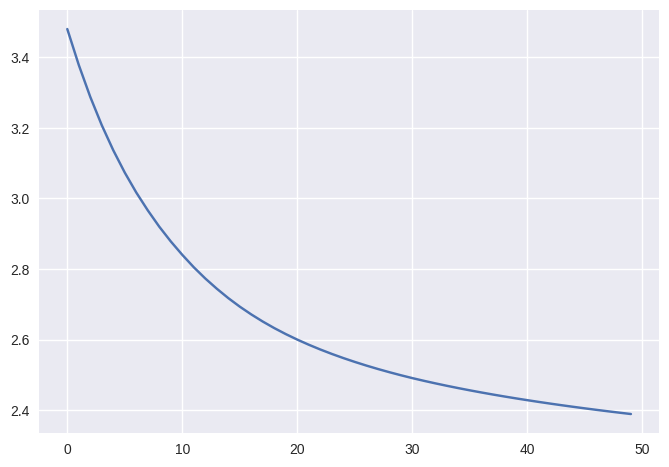

In [115]:
train(model, x, y)

In [116]:
tree = [1, {"x": 5, "y": [1, 4]}, Model()]

In [117]:
flat, _ = jax.tree_util.tree_flatten_with_path(tree)

In [118]:
for keypath, value in flat:
    print(keypath, value)

(SequenceKey(idx=0),) 1
(SequenceKey(idx=1), DictKey(key='x')) 5
(SequenceKey(idx=1), DictKey(key='y'), SequenceKey(idx=0)) 1
(SequenceKey(idx=1), DictKey(key='y'), SequenceKey(idx=1)) 4
(SequenceKey(idx=2),) <__main__.Model object at 0x7ff630122ce0>


In [119]:
for keypath, value in flat:
    print(jax.tree_util.keystr(keypath), value)

[0] 1
[1]['x'] 5
[1]['y'][0] 1
[1]['y'][1] 4
[2] <__main__.Model object at 0x7ff630122ce0>


In [120]:
jax.tree_util.tree_map_with_path(lambda k, x: {k: x}, tree)

[{(SequenceKey(idx=0),): 1},
 {'x': {(SequenceKey(idx=1), DictKey(key='x')): 5},
  'y': [{(SequenceKey(idx=1), DictKey(key='y'), SequenceKey(idx=0)): 1},
   {(SequenceKey(idx=1), DictKey(key='y'), SequenceKey(idx=1)): 4}]},
 {(SequenceKey(idx=2),): <__main__.Model at 0x7ff630122ce0>}]

In [132]:
class Container:
    
    def __init__(self, name) -> None:
        self.name = name
        self.w = 1.0
        self.b = 2.0

def flatten(container):
    return [container.w, container.b], container.name

def unflatten(name, values):
    return Container(name)


In [133]:
jax.tree_util.register_pytree_node(Container, flatten, unflatten)

In [134]:
for k in jax.tree_util.tree_leaves([(0, 2), Container("A")]):
    print(k)

0
2
1.0
2.0


In [138]:
jax.grad(jnp.sin)(np.pi / 3.0)

Array(0.49999997, dtype=float32, weak_type=True)

In [140]:
jax.grad(jax.grad(jnp.sin))(np.pi / 6.0)

Array(-0.5, dtype=float32, weak_type=True)

In [141]:
def f(params, x):
    return x @ params["w"] + params["b"]


In [157]:
np.random.seed(0)
params = {"w": jnp.array(np.random.normal(size=(2, 5))), 
          "b": jnp.array(np.random.normal(size=(5,))), 
          }
x = jnp.array(np.random.normal(size=(4, 2)))

In [167]:
jacf = jax.jacfwd(f)(params, x)

In [168]:
jacf["w"].shape

(4, 5, 2, 5)

In [169]:
jacf["b"].shape

(4, 5, 5)

In [170]:
jacr = jax.jacrev(f)(params, x)

In [171]:
jacr["w"].shape

(4, 5, 2, 5)

In [173]:
jnp.array_equal(jacr["w"], jacf["w"])

Array(True, dtype=bool)

In [181]:
jax.jvp(f, 
        (params, x), 
        ({"w": jnp.ones_like(params["w"]),
          "b":   jnp.zeros_like(params["b"])}, 
         x))

(Array([[-0.7274679 ,  3.0073028 ,  0.86147785,  0.7151864 ,  1.6804861 ],
        [-0.5238205 ,  1.6696199 ,  0.5128565 , -0.3703772 ,  0.18926343],
        [ 1.1323543 , -1.313065  ,  0.3115151 , -1.5287457 , -2.199464  ],
        [ 0.45226657,  2.5371146 ,  1.2699203 ,  1.4971383 ,  2.01947   ]],      dtype=float32),
 Array([[ 0.95624197,  3.3807828 ,  1.9281936 ,  2.421265  ,  3.0643764 ],
        [-0.55995464,  0.3232559 , -0.1402718 , -0.3841428 , -0.14669037],
        [-2.4187746 , -6.174424  , -3.856608  , -5.057506  , -6.0504127 ],
        [ 1.8262777 ,  2.600896  ,  2.0269375 ,  2.893518  ,  3.0936615 ]],      dtype=float32))